In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
dataFrame = pd.read_csv('assets\dataset-training\data.csv')

dataFrame

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = np.array(dataFrame)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [20]:
Y_train

array([3, 2, 6, ..., 1, 3, 6], dtype=int64)

In [21]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [22]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [23]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[7 8 2 ... 8 8 2] [3 2 6 ... 1 3 6]
0.09541463414634146
Iteration:  10
[8 8 2 ... 1 8 1] [3 2 6 ... 1 3 6]
0.20609756097560974
Iteration:  20
[6 8 2 ... 1 8 1] [3 2 6 ... 1 3 6]
0.28904878048780486
Iteration:  30
[6 8 6 ... 1 8 1] [3 2 6 ... 1 3 6]
0.3347317073170732
Iteration:  40
[6 1 6 ... 1 8 1] [3 2 6 ... 1 3 6]
0.36585365853658536
Iteration:  50
[6 1 6 ... 1 6 1] [3 2 6 ... 1 3 6]
0.39421951219512197
Iteration:  60
[6 1 6 ... 1 6 6] [3 2 6 ... 1 3 6]
0.43017073170731707
Iteration:  70
[6 1 6 ... 1 8 6] [3 2 6 ... 1 3 6]
0.47368292682926827
Iteration:  80
[6 1 6 ... 1 3 6] [3 2 6 ... 1 3 6]
0.5062439024390244
Iteration:  90
[6 3 6 ... 1 3 6] [3 2 6 ... 1 3 6]
0.5334878048780488
Iteration:  100
[6 3 6 ... 1 3 6] [3 2 6 ... 1 3 6]
0.5601951219512196
Iteration:  110
[6 3 6 ... 1 3 6] [3 2 6 ... 1 3 6]
0.5818780487804878
Iteration:  120
[6 3 6 ... 1 3 6] [3 2 6 ... 1 3 6]
0.5994146341463414
Iteration:  130
[6 3 6 ... 1 3 6] [3 2 6 ... 1 3 6]
0.6166829268292683
Iteration:

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [25]:
print(get_accuracy(make_predictions(X_dev,W1,b1,W2,b2) , Y_dev))

[0 3 8 1 3 9 7 0 6 4 9 9 0 6 4 5 5 6 7 6 6 4 3 6 0 3 7 4 0 0 7 7 7 1 7 6 8
 8 0 4 9 7 4 8 8 5 3 5 4 0 6 8 3 1 9 6 4 4 3 6 9 0 0 0 4 4 9 6 6 4 2 9 2 5
 0 2 6 3 7 0 6 2 5 7 8 0 8 0 9 9 0 3 1 2 0 7 0 0 3 8 8 7 2 4 6 8 0 0 4 9 1
 0 0 4 0 9 3 6 8 0 1 1 9 4 2 1 0 3 1 0 7 0 9 1 2 9 4 4 5 4 2 2 5 6 9 7 9 7
 0 1 8 2 3 5 7 6 0 0 7 0 5 1 8 4 2 3 0 8 1 7 9 7 9 5 7 8 8 2 3 2 3 8 9 8 6
 5 0 8 1 9 4 8 0 8 3 2 9 8 7 8 8 7 0 0 5 1 7 8 8 0 1 4 9 1 2 6 6 8 1 2 6 1
 1 9 2 3 9 1 1 1 8 1 7 1 0 4 0 5 4 6 0 7 7 7 8 4 3 0 1 1 8 5 4 3 6 7 1 1 8
 9 9 9 4 2 4 7 7 9 3 1 6 5 8 0 9 3 8 2 1 6 6 9 2 1 6 8 4 8 2 0 9 1 6 1 4 7
 1 2 1 8 2 8 4 4 6 8 9 1 0 1 1 6 4 9 5 8 8 2 2 4 7 4 0 6 0 8 1 1 9 0 6 4 9
 9 3 0 8 8 8 3 9 2 9 4 4 8 8 0 3 2 3 0 4 6 1 3 9 9 1 0 4 2 0 4 9 7 8 9 7 6
 9 6 5 6 5 6 6 8 7 3 0 7 1 2 6 8 1 0 1 4 7 2 2 4 0 4 4 3 1 7 1 7 3 2 4 6 4
 8 2 7 2 5 0 1 1 4 8 3 3 1 5 0 0 5 2 3 7 3 7 6 0 2 3 7 4 3 0 9 0 0 8 1 2 2
 1 7 5 4 5 1 5 7 1 1 5 1 8 0 7 0 6 7 5 1 2 3 6 5 1 3 0 3 2 4 1 4 8 8 6 9 3
 4 9 4 3 2 0 4 4 3 7 8 2 

Prediction:  [2]
Label:  3


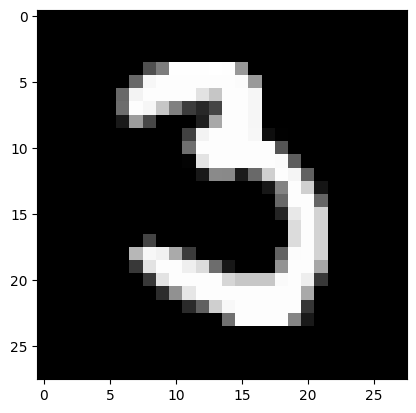

Prediction:  [2]
Label:  2


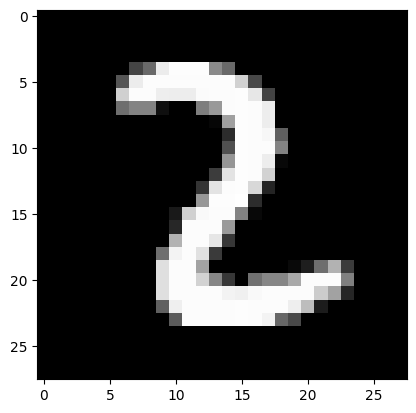

Prediction:  [6]
Label:  6


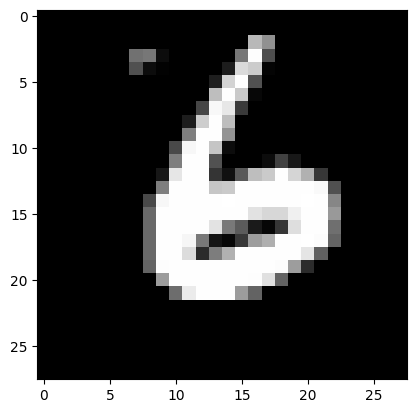

Prediction:  [2]
Label:  3


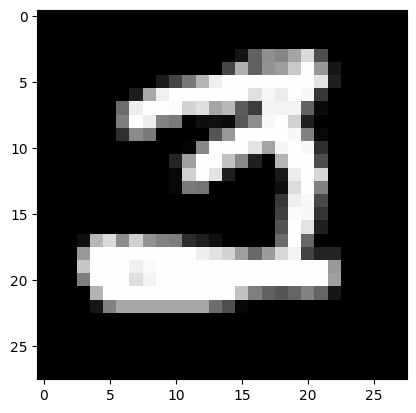

Prediction:  [4]
Label:  9


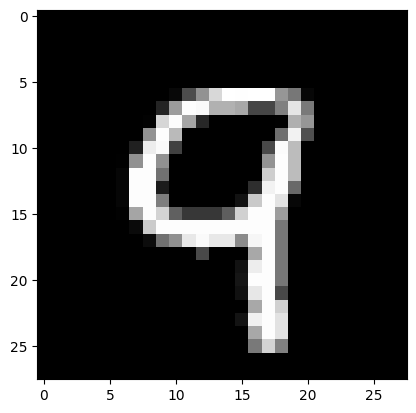

Prediction:  [4]
Label:  4


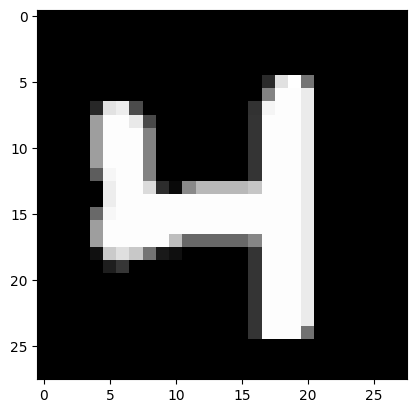

Prediction:  [7]
Label:  7


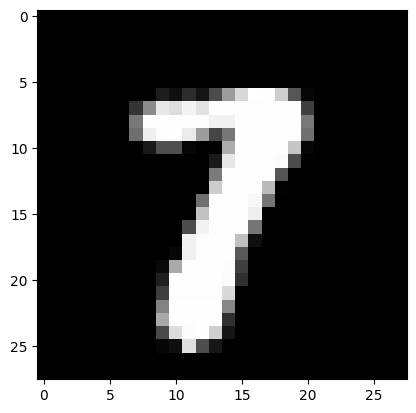

Prediction:  [9]
Label:  9


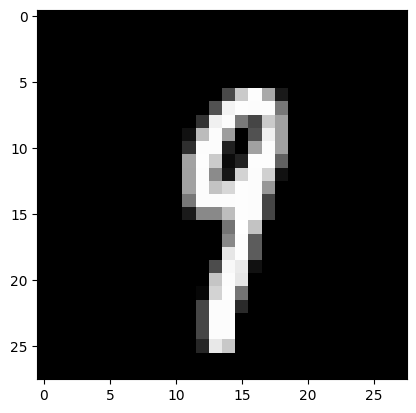

Prediction:  [9]
Label:  9


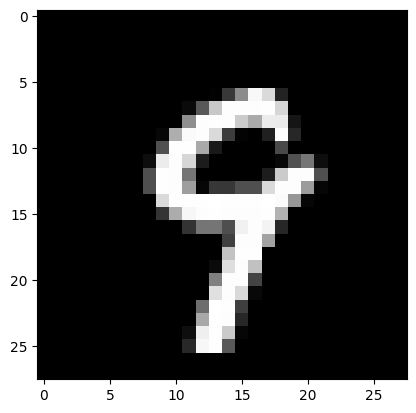

Prediction:  [6]
Label:  6


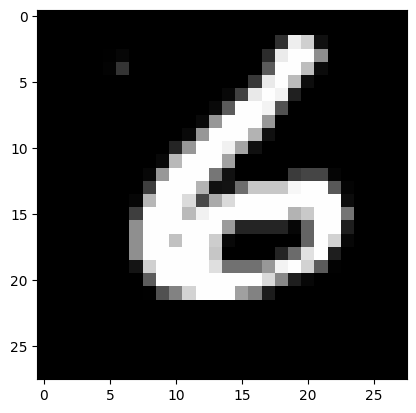

Prediction:  [6]
Label:  6


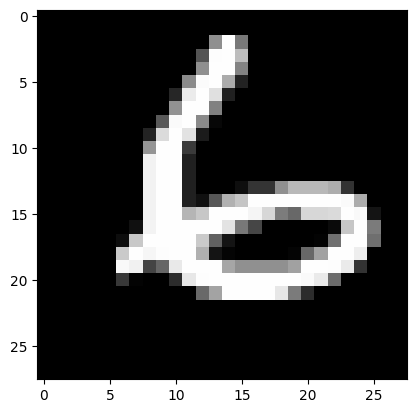

Prediction:  [9]
Label:  9


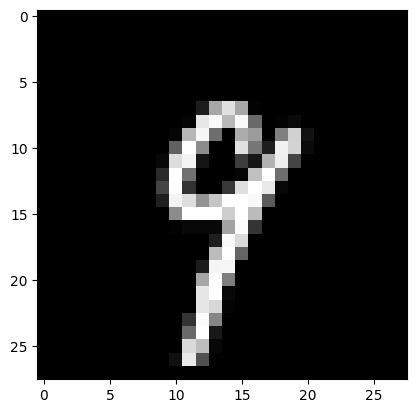

Prediction:  [8]
Label:  8


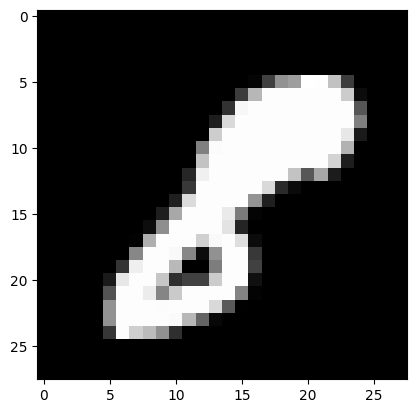

Prediction:  [6]
Label:  6


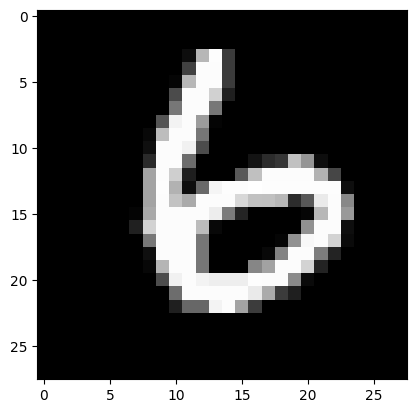

Prediction:  [4]
Label:  4


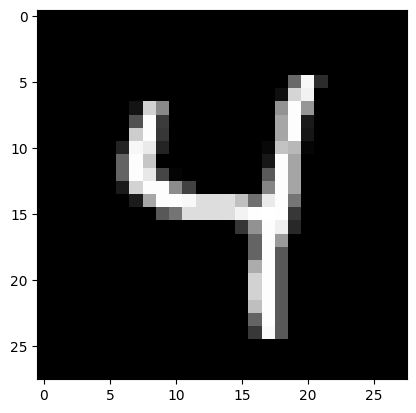

Prediction:  [4]
Label:  4


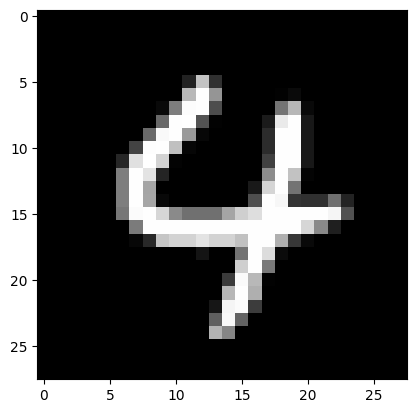

Prediction:  [3]
Label:  3


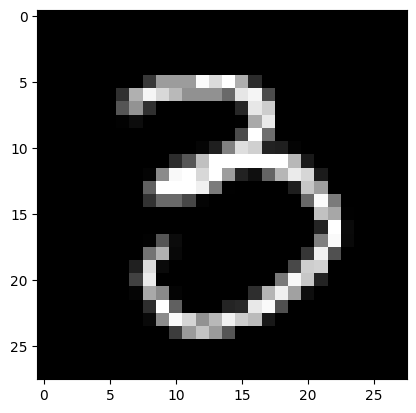

Prediction:  [4]
Label:  4


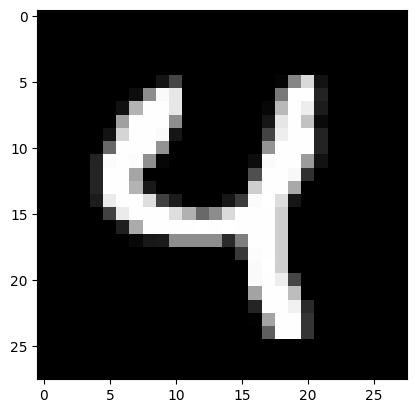

Prediction:  [7]
Label:  2


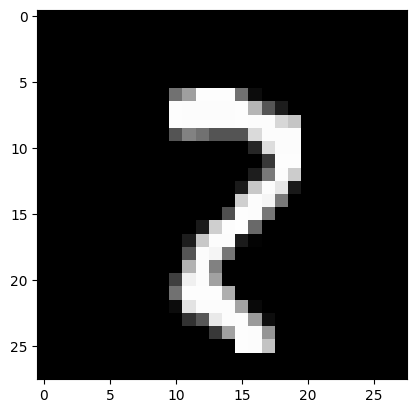

Prediction:  [9]
Label:  9


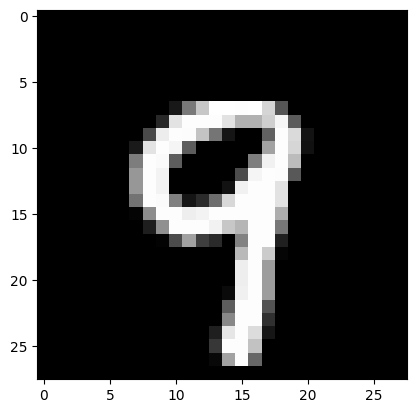

Prediction:  [3]
Label:  3


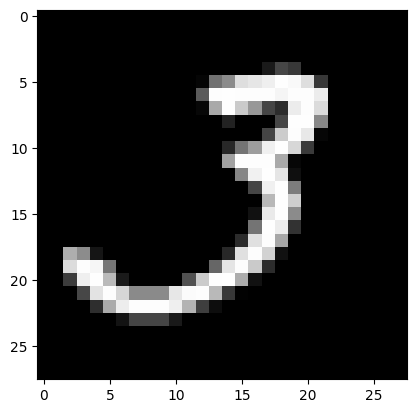

Prediction:  [1]
Label:  1


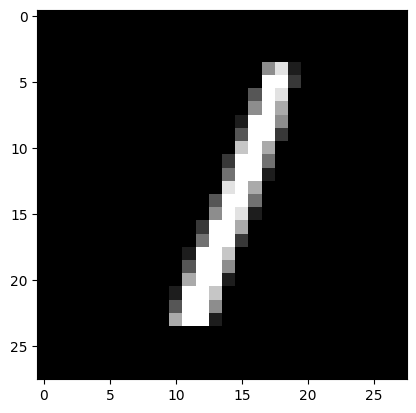

Prediction:  [5]
Label:  5


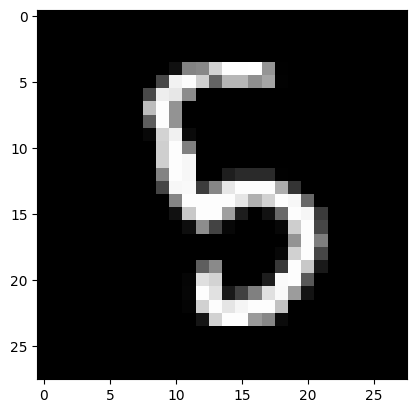

Prediction:  [2]
Label:  2


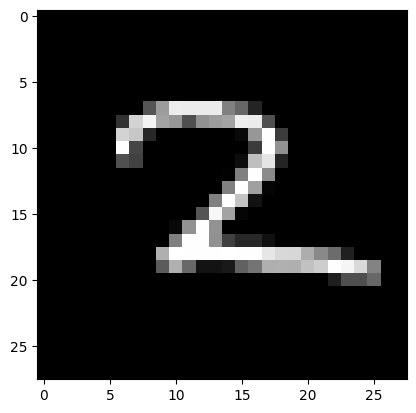

Prediction:  [4]
Label:  4


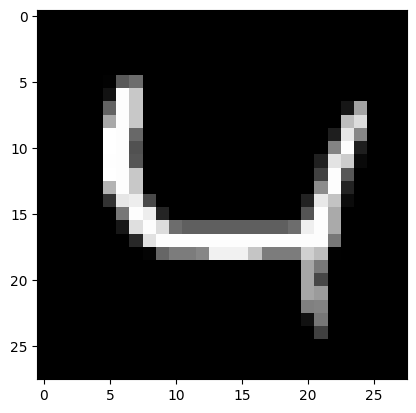

Prediction:  [6]
Label:  5


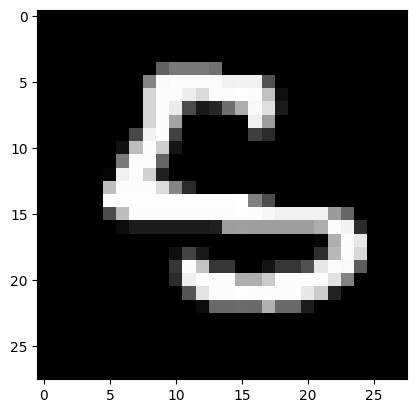

Prediction:  [1]
Label:  1


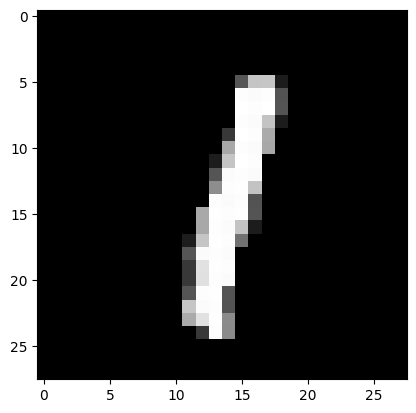

Prediction:  [4]
Label:  4


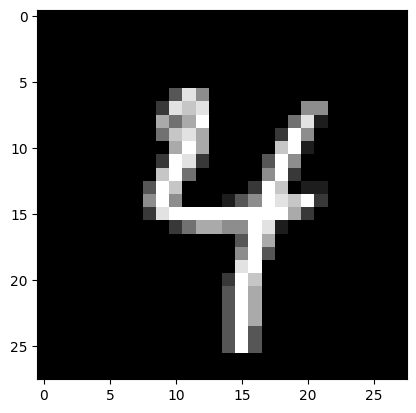

Prediction:  [4]
Label:  4


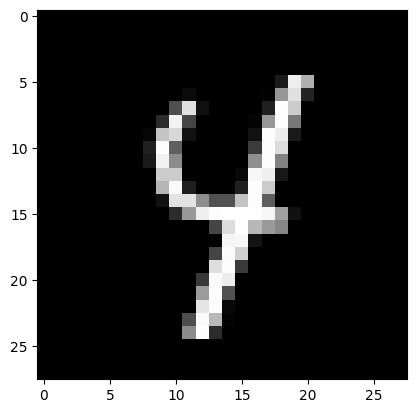

Prediction:  [7]
Label:  7


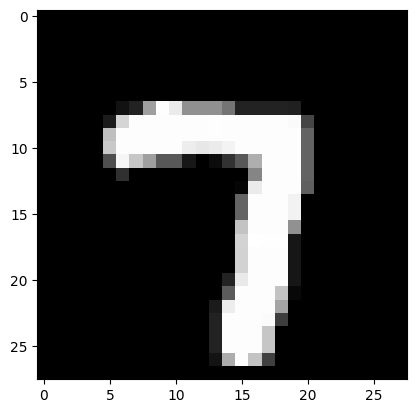

Prediction:  [6]
Label:  1


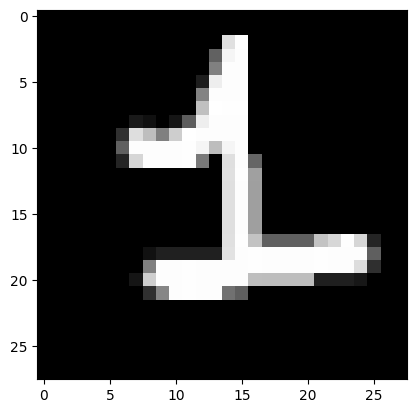

Prediction:  [3]
Label:  3


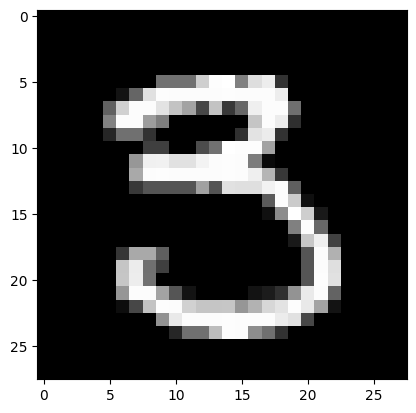

Prediction:  [0]
Label:  0


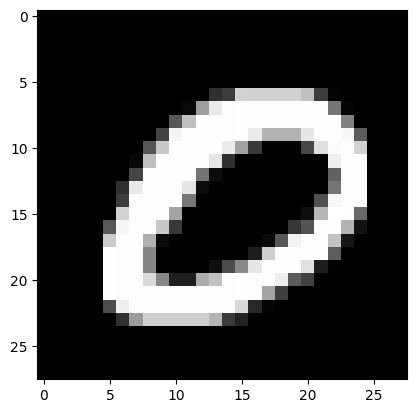

Prediction:  [5]
Label:  5


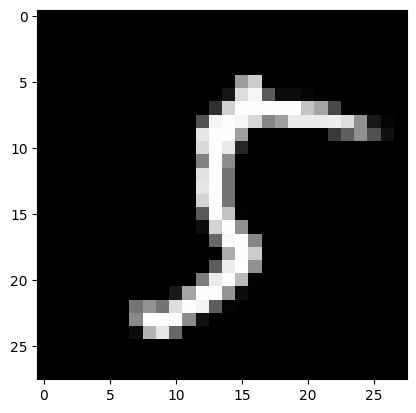

Prediction:  [3]
Label:  3


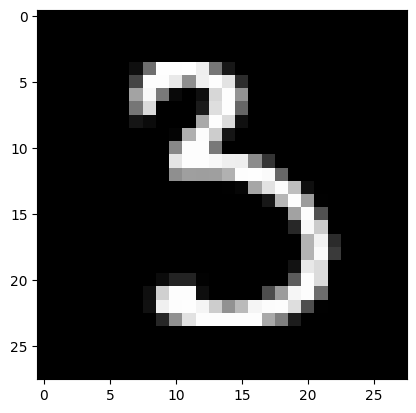

Prediction:  [6]
Label:  6


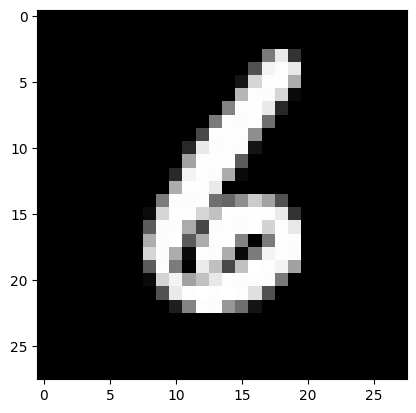

Prediction:  [6]
Label:  6


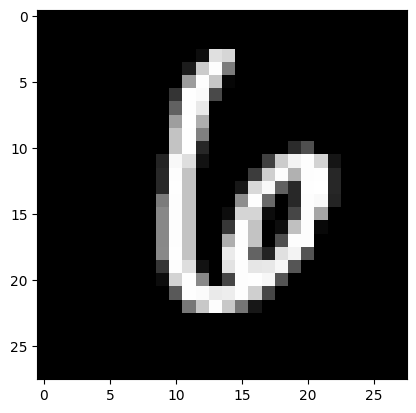

Prediction:  [7]
Label:  7


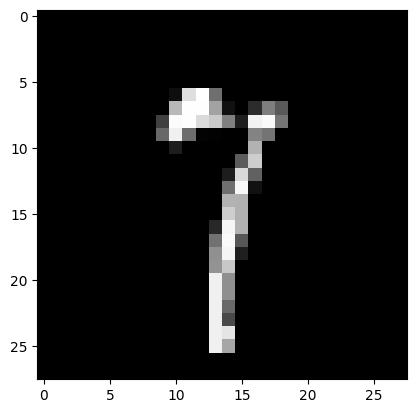

Prediction:  [8]
Label:  8


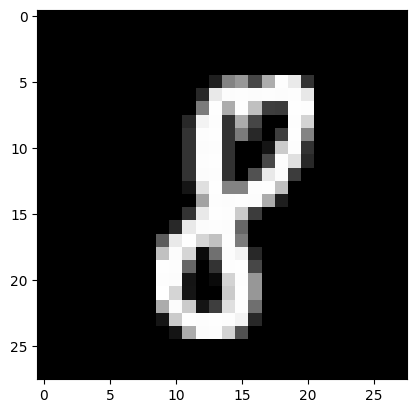

Prediction:  [8]
Label:  1


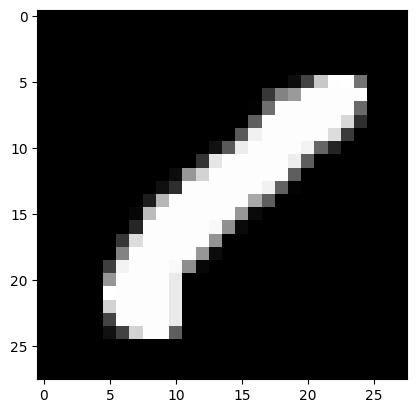

Prediction:  [6]
Label:  6


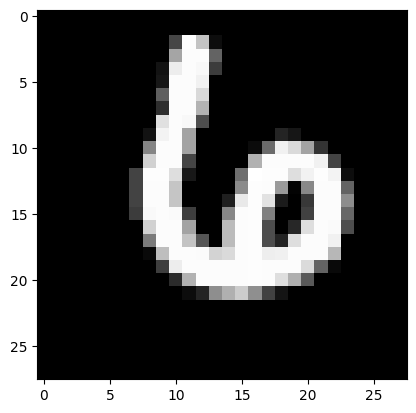

Prediction:  [4]
Label:  4


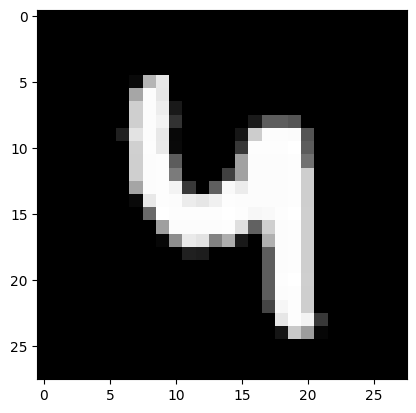

Prediction:  [9]
Label:  9


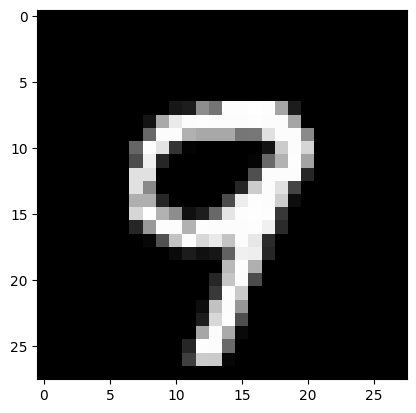

Prediction:  [7]
Label:  7


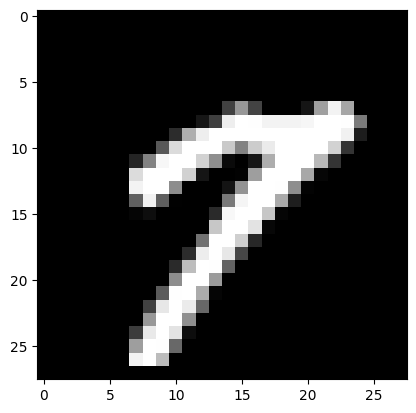

Prediction:  [8]
Label:  1


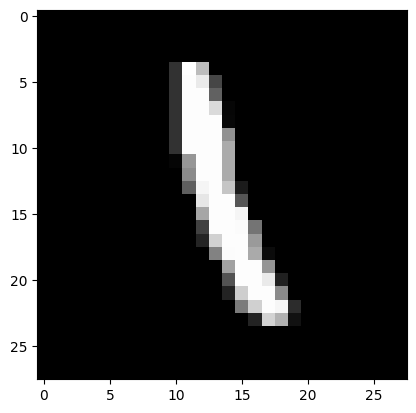

Prediction:  [0]
Label:  0


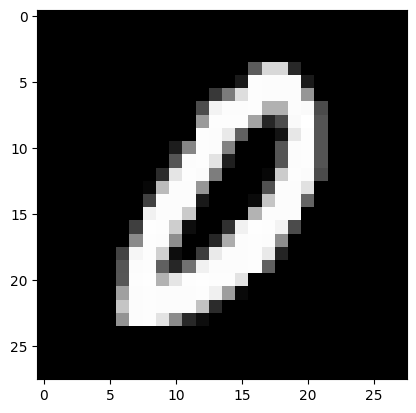

Prediction:  [1]
Label:  1


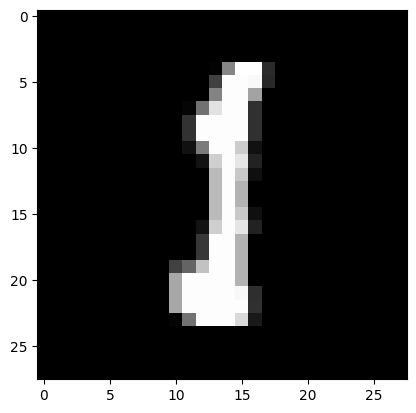

Prediction:  [5]
Label:  5


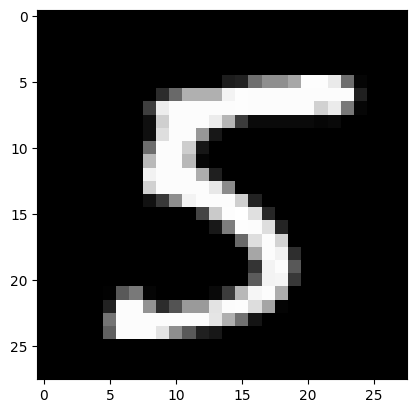

Prediction:  [1]
Label:  1


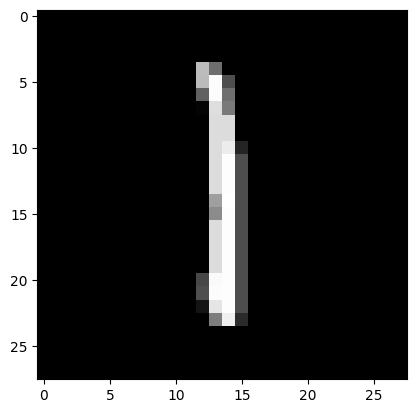

Prediction:  [1]
Label:  1


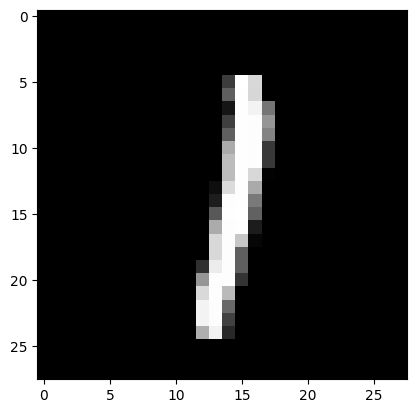

Prediction:  [1]
Label:  1


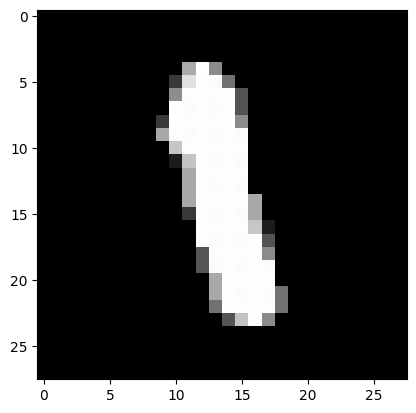

Prediction:  [1]
Label:  1


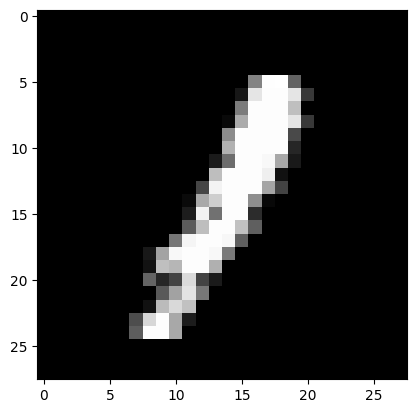

Prediction:  [8]
Label:  8


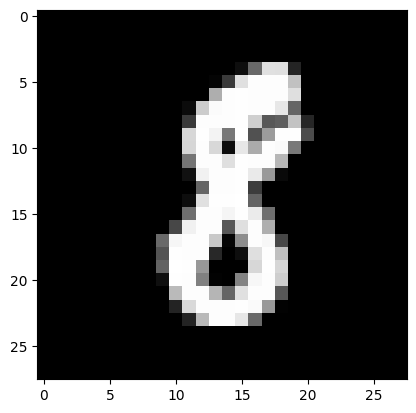

Prediction:  [3]
Label:  3


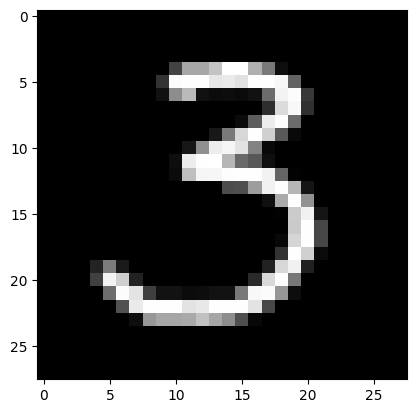

Prediction:  [3]
Label:  3


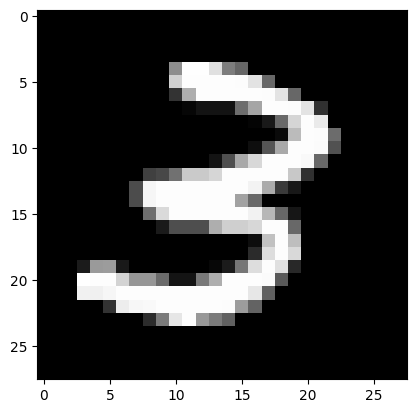

Prediction:  [2]
Label:  2


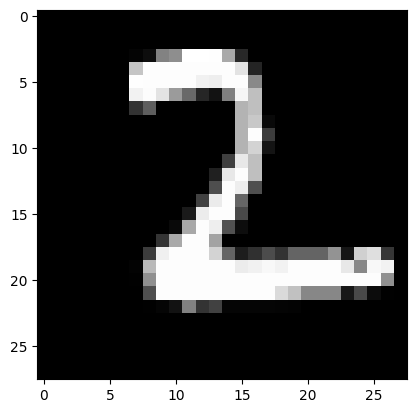

Prediction:  [6]
Label:  5


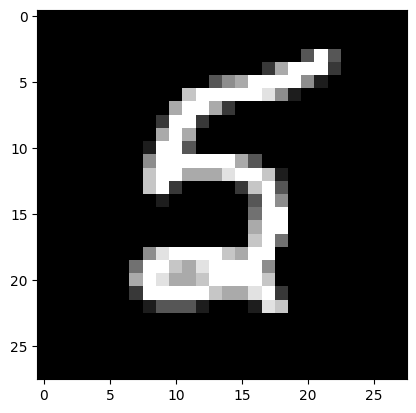

Prediction:  [8]
Label:  8


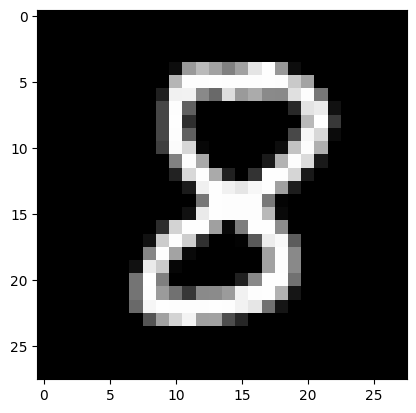

Prediction:  [1]
Label:  1


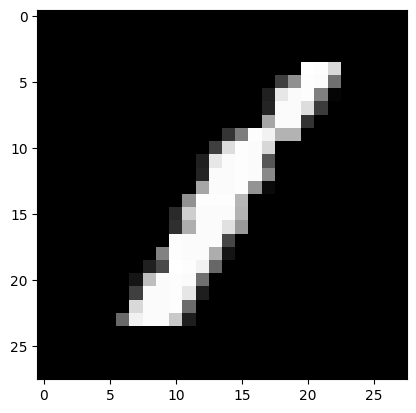

Prediction:  [0]
Label:  0


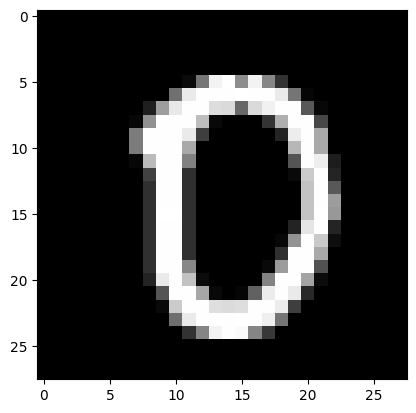

Prediction:  [8]
Label:  8


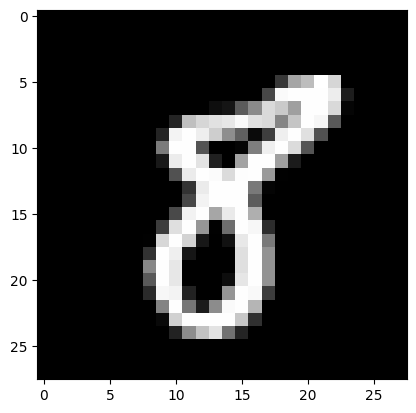

Prediction:  [8]
Label:  5


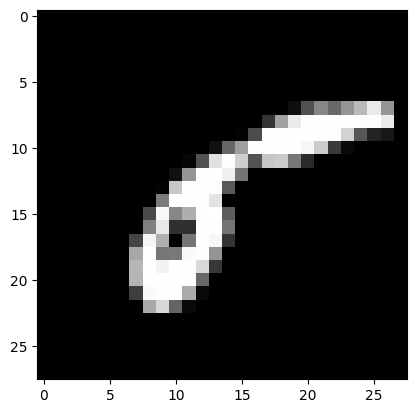

Prediction:  [9]
Label:  9


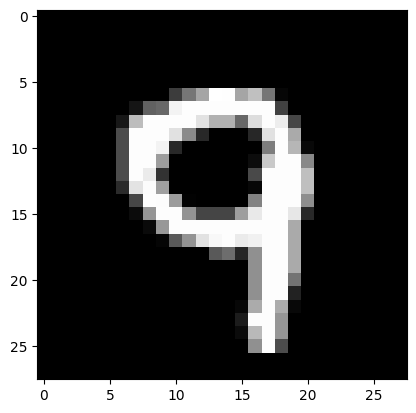

Prediction:  [2]
Label:  8


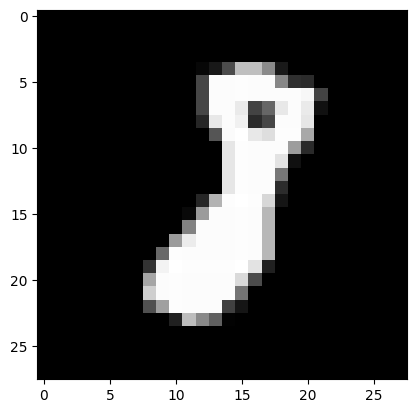

Prediction:  [1]
Label:  1


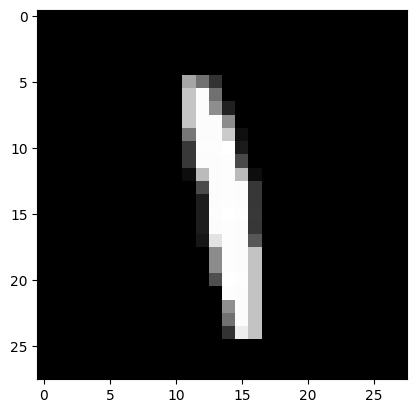

Prediction:  [4]
Label:  9


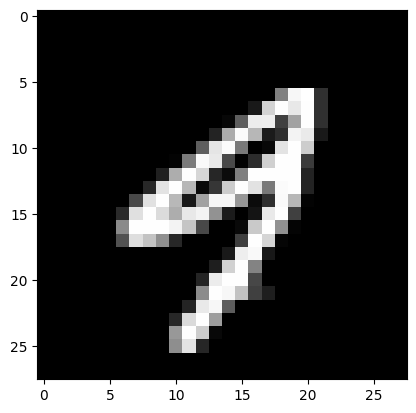

Prediction:  [6]
Label:  6


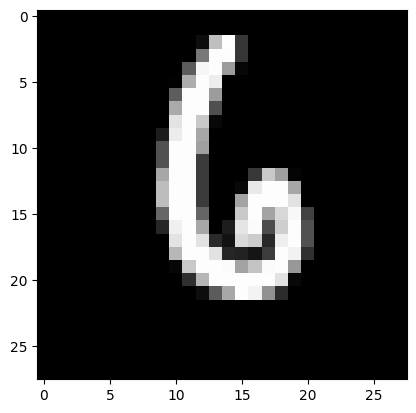

Prediction:  [0]
Label:  5


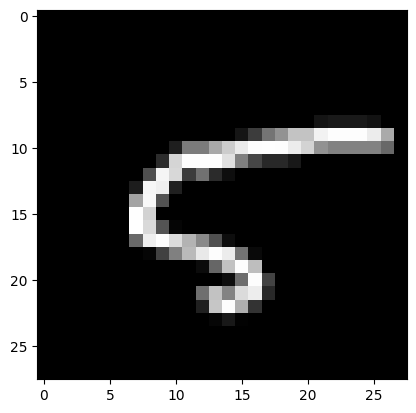

Prediction:  [3]
Label:  5


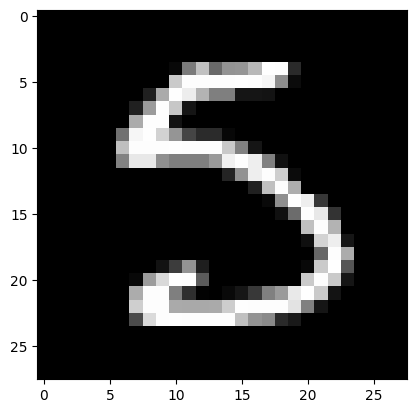

Prediction:  [1]
Label:  1


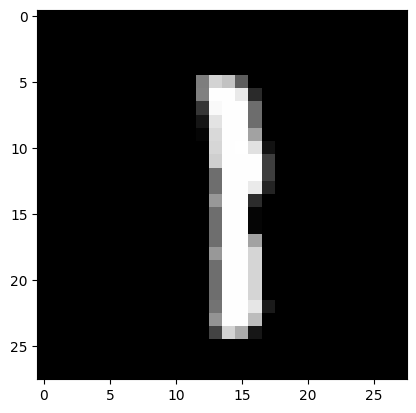

Prediction:  [5]
Label:  5


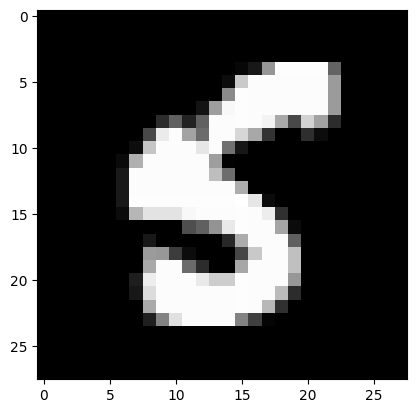

Prediction:  [5]
Label:  0


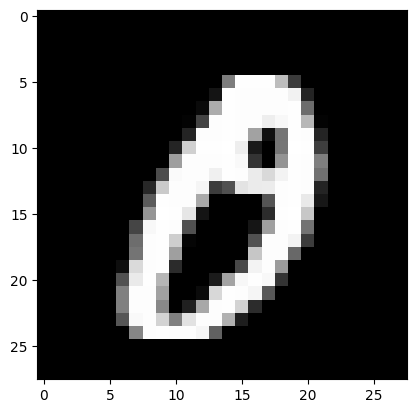

Prediction:  [2]
Label:  2


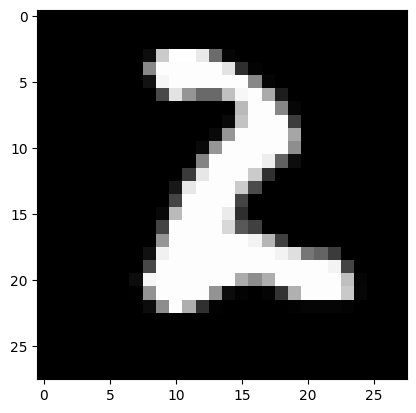

Prediction:  [0]
Label:  0


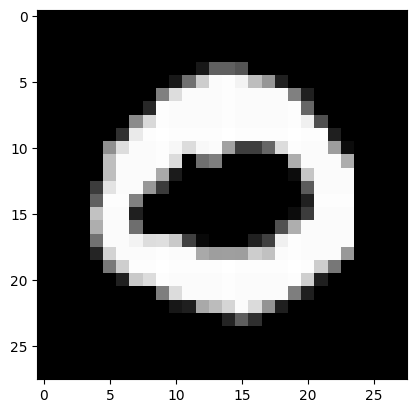

Prediction:  [8]
Label:  8


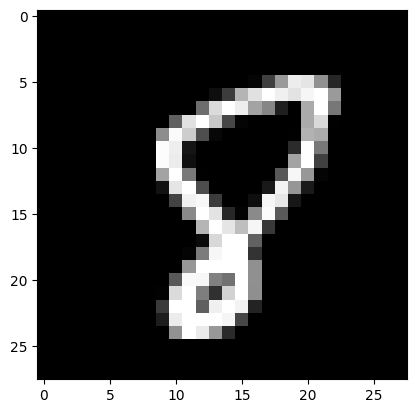

Prediction:  [4]
Label:  4


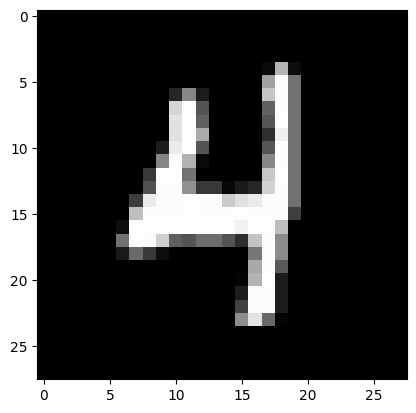

Prediction:  [6]
Label:  6


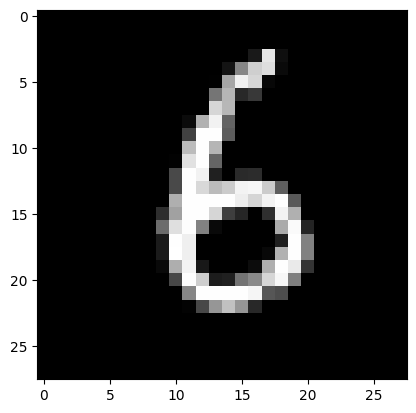

Prediction:  [1]
Label:  8


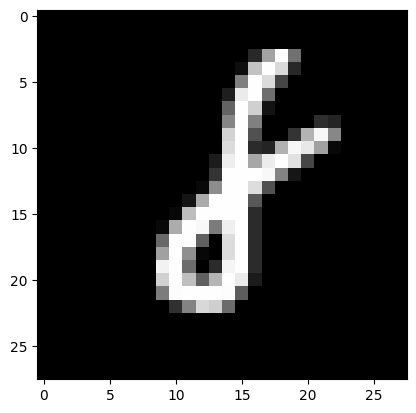

Prediction:  [4]
Label:  9


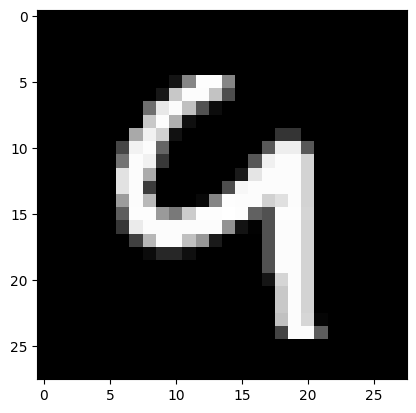

Prediction:  [9]
Label:  9


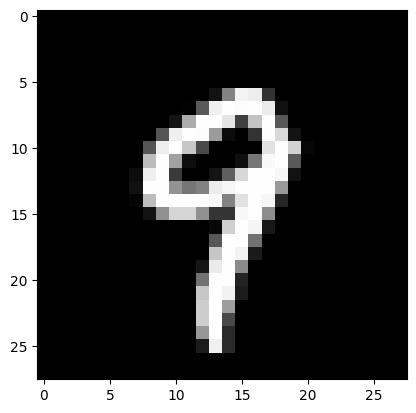

Prediction:  [1]
Label:  1


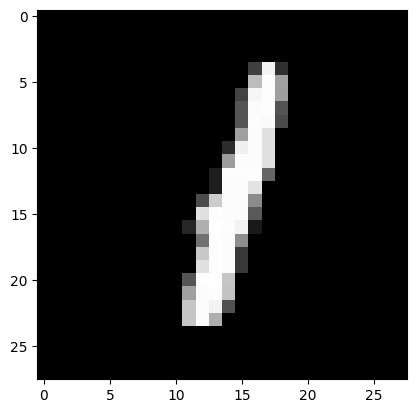

Prediction:  [7]
Label:  7


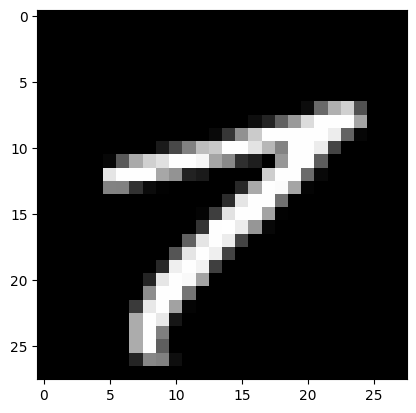

Prediction:  [4]
Label:  4


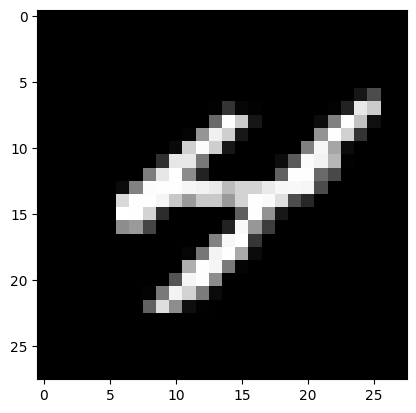

Prediction:  [3]
Label:  3


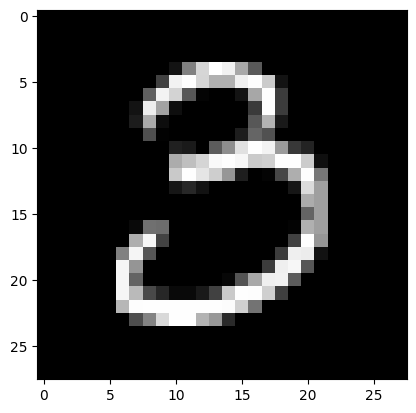

Prediction:  [1]
Label:  1


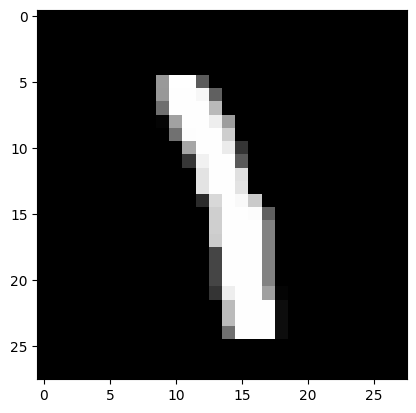

Prediction:  [7]
Label:  2


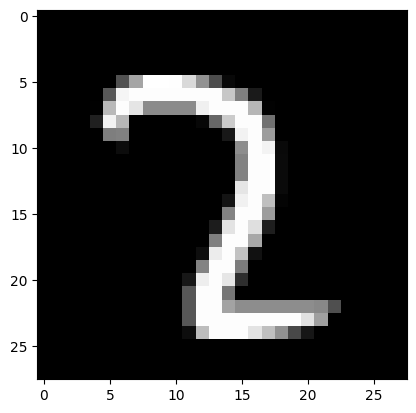

Prediction:  [5]
Label:  5


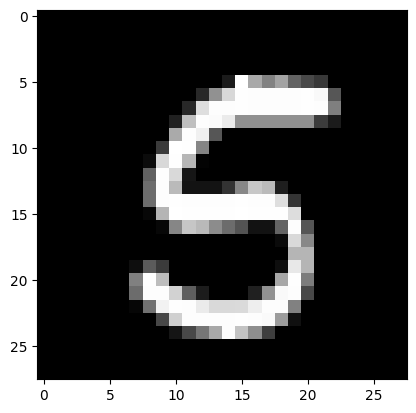

Prediction:  [4]
Label:  4


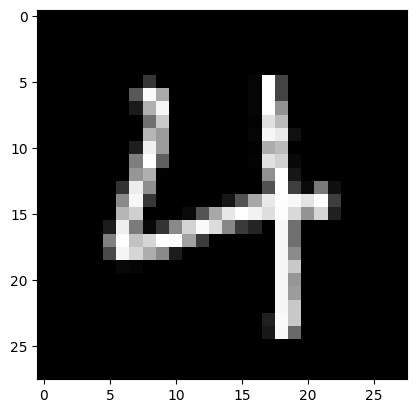

Prediction:  [6]
Label:  6


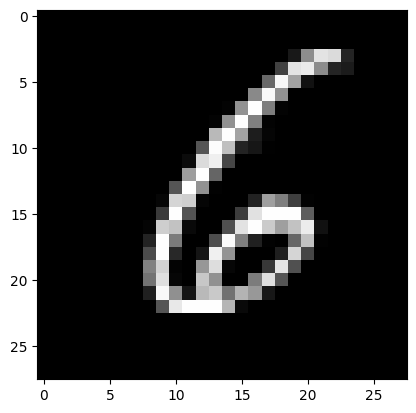

Prediction:  [8]
Label:  8


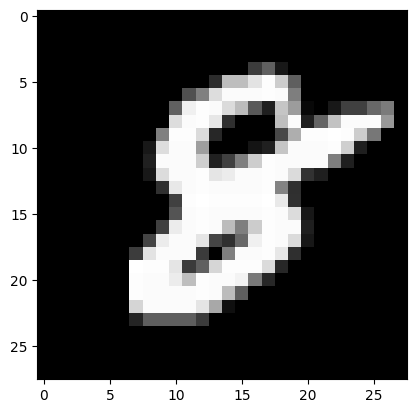

Prediction:  [3]
Label:  3


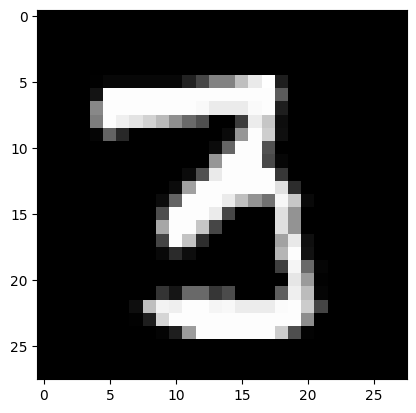

Prediction:  [5]
Label:  5


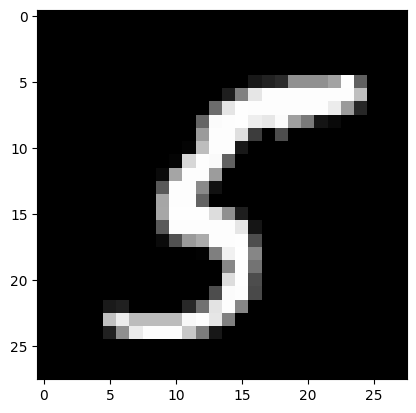

Prediction:  [6]
Label:  6


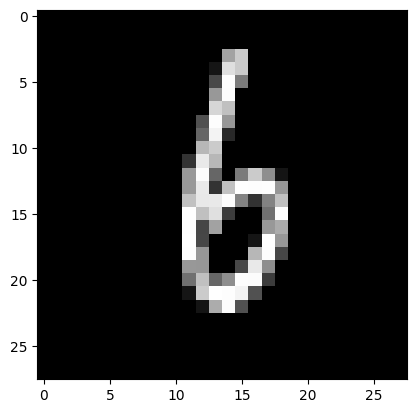

Prediction:  [9]
Label:  9


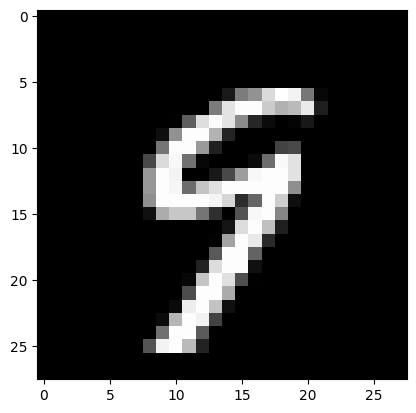

Prediction:  [0]
Label:  0


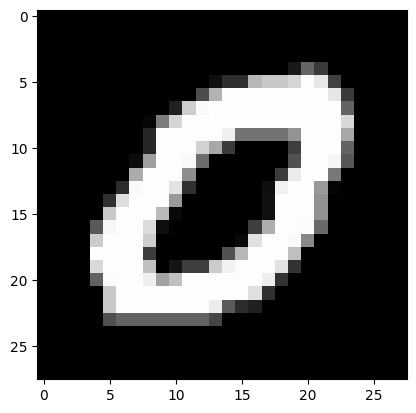

Prediction:  [2]
Label:  2


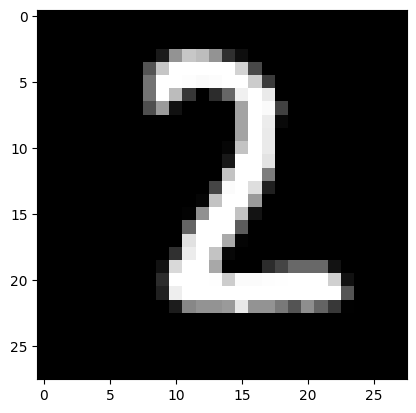

Prediction:  [5]
Label:  5


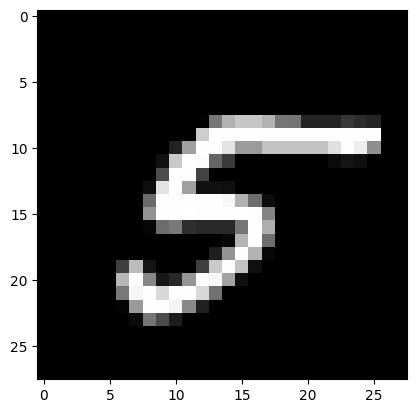

Prediction:  [6]
Label:  6


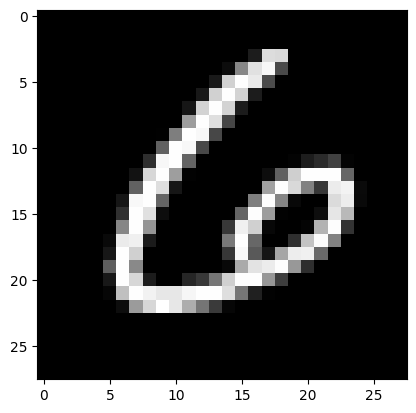

Prediction:  [1]
Label:  1


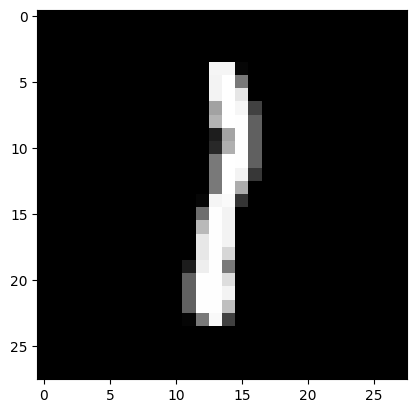

Prediction:  [2]
Label:  2


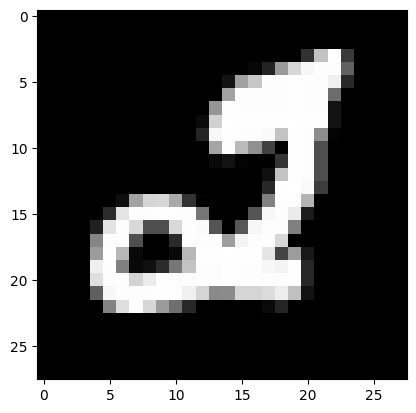

In [26]:
for i in range(100):
    test_prediction(i, W1, b1, W2, b2)